In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import optimizers
import keras
import tensorflow

In [2]:
print(tensorflow.__version__)
print(keras.__version__)

2.6.0
2.6.0


#  keras 기반의 regression

## 직선의 방정식

In [24]:
# w = 2.1 ,   b = 0.13
X = np.array([[1, 1],
              [2, 1], 
              [3, 1]])
y = np.array([[2.2], [4.4], [6.4]])

In [4]:
model = Sequential()   # 출력값을 다층의 입력으로 넣어줌
model.add(  Dense(1)     )   # 출력층 추가
model.compile(loss='mse',  optimizer='sgd' )    # 최적화 방법 설정,  loss 함수,  경사하강법(gd)

In [5]:
model.fit(X, y, epochs = 10)

Epoch 1/10
1/1 [==============================] - 0s 160ms/step - loss: 10.1734
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 7.7697
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 5.9465
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 4.5636
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 3.5145
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 2.7186
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 2.1146
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 1.6561
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 1.3081
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 1.0437


In [6]:
w = model.layers[0].get_weights()[0]
b = model.layers[0].get_weights()[1]

print(w, b)

[[1.2893912]
 [0.7939572]] [0.32609215]


In [7]:
model.predict(X)

array([[2.4094405],
       [3.6988318],
       [4.988223 ]], dtype=float32)

In [8]:
model = Sequential()   # 출력값을 다층의 입력으로 넣어줌
model.add(  Dense(1)     )   # 출력층 추가
model.compile(loss='mse',  optimizer='sgd' )    # 최적화 방법 설정,  loss 함수,  경사하강법(gd)
hist = model.fit(X, y, epochs = 10000, verbose = 0)

array([[2.2333477],
       [4.333335 ],
       [6.433322 ]], dtype=float32)

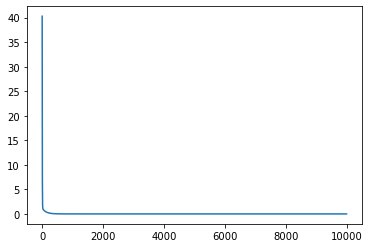

In [9]:
loss = hist.history['loss']
# print(len(loss), loss)
plt.plot(loss)
model.predict(X)

In [10]:
model.layers[0].get_weights()

[array([[2.099987 ],
        [0.6358105]], dtype=float32),
 array([-0.50244975], dtype=float32)]

In [9]:
model = Sequential()   # 출력값을 다층의 입력으로 넣어줌
model.add(  Dense(1)     )   # 출력층 추가
mysgd = optimizers.SGD(learning_rate = 0.1)
model.compile(loss='mse',  optimizer='sgd' )    # 최적화 방법 설정,  loss 함수,  경사하강법(gd)
hist = model.fit(X, y, epochs = 1000, verbose = 0)

# 주가 모델링

In [10]:
Interest_Rate =  np.array([2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,
                      2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75 , 1.75])
Unemployment_Rate = np.array([5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,
                         5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2 , 6.1])
Stock_Index_Price = np.array([1464,1394,1357,1293,1256,1254,
                         1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719])

n = Interest_Rate.size
X = np.ones((n, 2))
X[:, 0] = Unemployment_Rate
X[:, 1] = Interest_Rate
X = X / 7
y = Stock_Index_Price.reshape(-1, 1) / 2000

In [18]:
model = Sequential() 

model.add(  Dense(1)     ) 

mysgd = optimizers.SGD(learning_rate=0.1)

model.compile(loss='mse',  optimizer=mysgd ) 
hist = model.fit(X, y, epochs=20000, verbose=0)

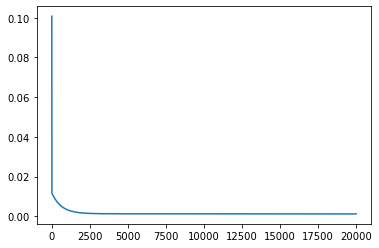

In [19]:
plt.plot(hist.history['loss'])

In [20]:
model.layers[0].get_weights()[0]

array([[-0.42539868],
       [ 1.6267867 ]], dtype=float32)

In [21]:
# 주가 예측, 실업률 5.3, 이자율 3.1
# y = w1 * x1 + w2 * x2 + b

x_ = np.array([[5.3, 3.1]]) / 7
model.predict(x_) * 2000

array([[1605.1001]], dtype=float32)

In [22]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [23]:
model = Sequential() 
model.add(  Dense(5, input_shape=(4,)   )     ) 
model.add(  Dense(4)     ) 
model.add(  Dense(10)     ) 
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_10 (Dense)             (None, 10)                50        
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


# 다층 비선형 신경망

In [29]:
X = np.array([[1],
              [2], 
              [3],
              [4],
              [5]]) / 5
y = np.array([[2.2], [4.4], [6.4], [5.7], [5.1]])


model = Sequential() 
model.add(  Dense(1)     ) 
mysgd = optimizers.SGD(learning_rate = 0.1)
model.compile(loss='mse',  optimizer = mysgd) 
model.fit(X, y, epochs = 1000)
model.predict(X)

Epoch 1/1000
1/1 [==============================] - 0s 128ms/step - loss: 31.7442
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 17.2868
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 9.7138
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 5.7453
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 3.6640
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.5709
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.9953
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.6907
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5280
Epoch 10/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.4397
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.3905
Epoch 12/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.3618
Epoch 13/1000
1/1 [==========================

1/1 [==============================] - 0s 1ms/step - loss: 1.0988
Epoch 104/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0980
Epoch 105/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0973
Epoch 106/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.0966
Epoch 107/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0959
Epoch 108/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0952
Epoch 109/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.0945
Epoch 110/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0939
Epoch 111/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0932
Epoch 112/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0926
Epoch 113/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0920
Epoch 114/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.0914
Epoch 115/1000
1/1 [=======================

1/1 [==============================] - 0s 1ms/step - loss: 1.0693
Epoch 205/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.0692
Epoch 206/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.0692
Epoch 207/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0691
Epoch 208/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0690
Epoch 209/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0690
Epoch 210/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.0689
Epoch 211/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0688
Epoch 212/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0688
Epoch 213/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0687
Epoch 214/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0687
Epoch 215/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0686
Epoch 216/1000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 1.0665
Epoch 306/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0665
Epoch 307/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0665
Epoch 308/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.0665
Epoch 309/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0665
Epoch 310/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0665
Epoch 311/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0665
Epoch 312/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.0665
Epoch 313/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0664
Epoch 314/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.0664
Epoch 315/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.0664
Epoch 316/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.0664
Epoch 317/1000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 1.0662
Epoch 407/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 408/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.0662
Epoch 409/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 410/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 411/1000
1/1 [==============================] - 0s 1000us/step - loss: 1.0662
Epoch 412/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 413/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 414/1000
1/1 [==============================] - 0s 1000us/step - loss: 1.0662
Epoch 415/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 416/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 417/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.0662
Epoch 418/1000
1/1 [=================

Epoch 507/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 508/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.0662
Epoch 509/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 510/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 511/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.0662
Epoch 512/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 513/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 514/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.0662
Epoch 515/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 516/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 517/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 518/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.0662
Epoch 519/1000
1/1 [========

1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 608/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.0662
Epoch 609/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 610/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 611/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 612/1000
1/1 [==============================] - 0s 999us/step - loss: 1.0662
Epoch 613/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 614/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 615/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.0662
Epoch 616/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 617/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 618/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 619/1000
1/1 [=====================

1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 709/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 710/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 711/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 712/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.0662
Epoch 713/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 714/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 715/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 716/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 717/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 718/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 719/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 720/1000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 810/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 811/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.0662
Epoch 812/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.0662
Epoch 813/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.0662
Epoch 814/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 815/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 816/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 817/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.0662
Epoch 818/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 819/1000
1/1 [==============================] - 0s 999us/step - loss: 1.0662
Epoch 820/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 821/1000
1/1 [=====================

1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 911/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.0662
Epoch 912/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 913/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 914/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 915/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 916/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 917/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 918/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 919/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 920/1000
1/1 [==============================] - 0s 1000us/step - loss: 1.0662
Epoch 921/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0662
Epoch 922/1000
1/1 [====================

array([[3.3400087],
       [4.050005 ],
       [4.760001 ],
       [5.469997 ],
       [6.1799927]], dtype=float32)

In [35]:
X = np.array([[1],
              [2], 
              [3],
              [4],
              [5],
              [6],
              [7]]) / 7
              
y = np.array([[2.2], [4.4], [6.4], [5.7], [5.1], [7.0], [8.6]])

In [31]:
model = Sequential() 
model.add(  Dense(1)     ) 
mysgd = optimizers.SGD(learning_rate=0.1)
model.compile(loss='mse',  optimizer = mysgd) 
model.fit(X, y, epochs=1000)
model.predict(X)

Epoch 1/1000
1/1 [==============================] - 0s 133ms/step - loss: 42.7039
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 23.7269
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 13.5873
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 8.1638
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 5.2571
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.6936
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.8473
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.3838
Epoch 9/1000
1/1 [==============================] - 0s 1ms/step - loss: 2.1250
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.9757
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.8850
Epoch 12/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.8259
Epoch 13/1000
1/1 [=========================

1/1 [==============================] - 0s 2ms/step - loss: 0.9322
Epoch 104/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.9297
Epoch 105/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.9273
Epoch 106/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.9249
Epoch 107/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.9226
Epoch 108/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.9203
Epoch 109/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.9181
Epoch 110/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.9159
Epoch 111/1000
1/1 [==============================] - 0s 999us/step - loss: 0.9138
Epoch 112/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.9117
Epoch 113/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.9097
Epoch 114/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.9077
Epoch 115/1000
1/1 [=====================

1/1 [==============================] - 0s 1ms/step - loss: 0.8372
Epoch 204/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8370
Epoch 205/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8368
Epoch 206/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8366
Epoch 207/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.8364
Epoch 208/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.8362
Epoch 209/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8360
Epoch 210/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8358
Epoch 211/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8356
Epoch 212/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8354
Epoch 213/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8352
Epoch 214/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.8351
Epoch 215/1000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.8289
Epoch 305/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.8289
Epoch 306/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8289
Epoch 307/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.8288
Epoch 308/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.8288
Epoch 309/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8288
Epoch 310/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8288
Epoch 311/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.8288
Epoch 312/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8288
Epoch 313/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8287
Epoch 314/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8287
Epoch 315/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8287
Epoch 316/1000
1/1 [====================

1/1 [==============================] - 0s 2ms/step - loss: 0.8282
Epoch 406/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.8282
Epoch 407/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8282
Epoch 408/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8282
Epoch 409/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.8282
Epoch 410/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8282
Epoch 411/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.8282
Epoch 412/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.8282
Epoch 413/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8282
Epoch 414/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.8282
Epoch 415/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8282
Epoch 416/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.8282
Epoch 417/1000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 507/1000
1/1 [==============================] - 0s 999us/step - loss: 0.8281
Epoch 508/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 509/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.8281
Epoch 510/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 511/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.8281
Epoch 512/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.8281
Epoch 513/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.8281
Epoch 514/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.8281
Epoch 515/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 516/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.8281
Epoch 517/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.8281
Epoch 518/1000
1/1 [===============

1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 608/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 609/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 610/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 611/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 612/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 613/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 614/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.8281
Epoch 615/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 616/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 617/1000
1/1 [==============================] - 0s 999us/step - loss: 0.8281
Epoch 618/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 619/1000
1/1 [=====================

1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 709/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 710/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 711/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.8281
Epoch 712/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 713/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 714/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 715/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 716/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.8281
Epoch 717/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 718/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 719/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 720/1000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 810/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 811/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 812/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 813/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 814/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.8281
Epoch 815/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 816/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.8281
Epoch 817/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.8281
Epoch 818/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 819/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.8281
Epoch 820/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 821/1000
1/1 [=======================

1/1 [==============================] - 0s 999us/step - loss: 0.8281
Epoch 911/1000
1/1 [==============================] - 0s 999us/step - loss: 0.8281
Epoch 912/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.8281
Epoch 913/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 914/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.8281
Epoch 915/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 916/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.8281
Epoch 917/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 918/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8281
Epoch 919/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.8281
Epoch 920/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.8281
Epoch 921/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.8281
Epoch 922/1000
1/1 [=============

array([[3.1535802],
       [3.9785774],
       [4.8035746],
       [5.628572 ],
       [6.4535694],
       [7.2785664],
       [8.103563 ]], dtype=float32)

array([[2.1409802],
       [4.7265735],
       [5.4645457],
       [5.6873384],
       [6.017176 ],
       [6.851902 ],
       [8.505192 ]], dtype=float32)

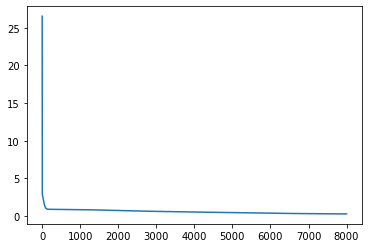

In [36]:
model = Sequential() 
model.add(  Dense(5, activation='sigmoid')  ) 
model.add(  Dense(1)  ) 
mysgd = optimizers.SGD(learning_rate=0.1)
model.compile(loss='mse',  optimizer = mysgd) 
hist = model.fit(X, y, epochs=8000, verbose=0)
plt.plot(hist.history['loss'])
model.predict(X)
#[2.2], [4.4], [6.4], [5.7], [5.1]]

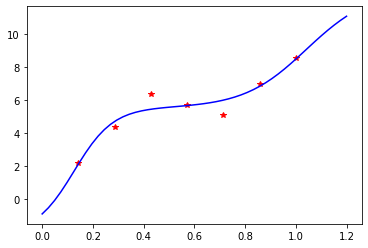

In [40]:
plt.plot(X[:, 0], y[:, 0], '*r')

test = np.linspace(0, 1.2, 50).reshape(-1, 1)
p = model.predict(test)
plt.plot(test[:, 0], p[:, 0], 'b')

# 로지스틱 회귀

In [43]:
X = np.array([0, 1, 0.2, 0.6, 5,      7,8,9,10]) / 10
y = np.array([0,0,0,0,0,    1,1,1,1])

In [44]:
model = Sequential()
model.add( Dense(1) )
mysgd = optimizers.SGD(learning_rate = 0.1)
model.compile(loss = 'mse', optimizer = mysgd)
model.fit(X, y, epochs = 1000, verbose = 0)
model.predict(X)

array([[-0.08663033],
       [ 0.03051852],
       [-0.06320056],
       [-0.01634102],
       [ 0.49911392],
       [ 0.7334116 ],
       [ 0.8505605 ],
       [ 0.9677093 ],
       [ 1.0848582 ]], dtype=float32)

In [45]:
# ([0, 0, 0, 0, 0,        1, 1, 1, 1])
p = model.predict(X)
(p > 0.5) * 1

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1]])

In [48]:
model = Sequential()
model.add( Dense(1, activation = 'sigmoid') )
mysgd = optimizers.SGD(learning_rate = 0.1)
model.compile(loss = 'mse', optimizer = mysgd)
model.fit(X, y, epochs = 10000, verbose = 0)
model.predict(X)

array([[0.00928953],
       [0.02070174],
       [0.0109117 ],
       [0.01504156],
       [0.35320967],
       [0.7351416 ],
       [0.8622117 ],
       [0.933807  ],
       [0.9695164 ]], dtype=float32)

# 이진 분류에서의 loss 함수

In [51]:
p = 0.000001        # sig(wx + b)
y = 1.0

print((p - y) ** 2)            # mse

0.9999980000009999


In [55]:
p = 0.0000001        # sig(wx + b)
y = 1.0
- (y * np.log(p + 1e-7) + (1 - y) * np.log(1 - p + 1e-7))         # binary cross entropy

15.424948470398375

In [56]:
p = np.array([0.1, 0.9, 0.2, 0.5])
y = np.array([0, 1, 1, 1])
cost = -  np.mean(    y * np.log(p+1e-7) + (1-y)*np.log(1-p+1e-7))  # binary  cross entropy
print(cost)

0.6283263005219083


In [57]:
X = np.array([0, 1, 0.2, 0.6, 5,      7,8,9,10]) / 10
y = np.array([0,0,0,0,0,    1,1,1,1])
#y = np.array([-2,-2,-2,-2,-2,    2,2,2,2])

model = Sequential() 
model.add(  Dense(1, activation='sigmoid')     ) 
mysgd = optimizers.SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy',  optimizer = mysgd) 
model.fit(X, y, epochs=1000, verbose=0)
model.predict(X)

array([[0.04530632],
       [0.07844862],
       [0.05063847],
       [0.06313008],
       [0.46846777],
       [0.7393056 ],
       [0.835716  ],
       [0.90123487],
       [0.9424241 ]], dtype=float32)

# softmax 정규화

In [58]:
# 기본 정규화
p = np.array([1.2, 2.4, 4.8])
n_p = p / np.sum(p)

print(n_p)

[0.14285714 0.28571429 0.57142857]


In [60]:
# softmax 정규화
p = np.exp(np.array([1.2, 2.4, 4.8]))
s_p = p / np.sum(p)

print(s_p)

[0.02443891 0.08114005 0.89442104]


# 다중 클래스에서의 loss

In [ ]:
p = [0, 0, 0.999]
y = [1, 0, 0]
# 에러는 크게 

p = [0.999, 0, 0]
y = [1.0, 0, 0]
# 에러는 0에 가깝게

p = [0.7, 0.2, 0.1]
y = [1, 0, 0]
# 에러는 0보다 다소 큰 값

In [61]:
p = np.array([0.999, 0, 0])
y = np.array([1.0, 0, 0])

-y * np.log(p + 1e-6)

array([0.0009995, 0.       , 0.       ])

# iris 데이터셋 분류

In [67]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
y_e = np.eye(3)[y]          # onehot encoding

print(X.shape)
# print(y_e)

(150, 4)


In [76]:
model = Sequential()
model.add(Dense(5, activation = 'sigmoid'))
model.add(Dense(5, activation = 'sigmoid'))
model.add(Dense(3, activation='softmax'))   # y = wx + b  3개의 확률값
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
hist =  model.fit(X, y_e, epochs=2000, verbose=0)

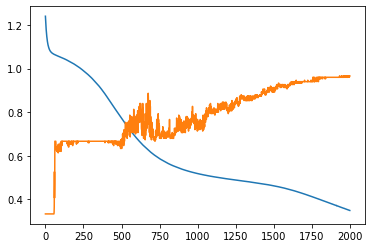

In [79]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])

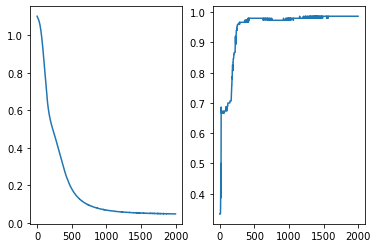

In [80]:
model = Sequential()
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))   # y = wx + b  3개의 확률값

#mysgd = optimizers.SGD(learning_rate=0.1)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist =  model.fit(X, y, epochs=2000, verbose=0)

plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'])

In [85]:
p = model.predict(X)
print(p.shape)
p = np.argmax(p, axis = 1)
print(p)

print(np.mean(p == y))  # 인식률
model.evaluate(X, y)

(150, 3)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.9866666666666667
5/5 [==============================] - 0s 1ms/step - loss: 0.0474 - accuracy: 0.9867


[0.04737335443496704, 0.9866666793823242]